In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.decomposition import PCA


%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
new_data = pd.DataFrame()

new_data['initial_list_status'] = data['initial_list_status'].map({'f': 0, 'w': 1})
new_data['dti'] = data['dti']
new_data['int_rate'] = data['int_rate']
new_data['emp_length'] = data['emp_length'].map({'< 1 year': 1, '1 year': 2, '2 years': 3,  '3 years': 4,  '4 years': 5,  '5 years': 6,  '6 years': 7,  '7 years': 8,  '8 years': 9,  '9 years': 10,  '10+ years': 11})
new_data['emp_length'].fillna(0, inplace=True)

new_data['mths_since_last_delinq'] = data['mths_since_last_delinq']
new_data['mths_since_last_delinq'].fillna(0, inplace=True)

new_data['revol_util'] = data['revol_util']
new_data['revol_util'].fillna(data['revol_util'].notnull().mean(), inplace=True)

new_data['tot_cur_bal'] = data['tot_cur_bal']
new_data['tot_cur_bal'].fillna(data['tot_cur_bal'].notnull().mean(), inplace=True)
le = LabelEncoder()
le.fit(data.grade.astype(str))
new_data['grade'] = le.transform((data['grade'].values))
      

In [4]:
new_data.head()

,initial_list_status,dti,int_rate,emp_length,mths_since_last_delinq,revol_util,tot_cur_bal,grade
0,0,13.85,11.99,5.0,0.0,61.2,295215.000000,1
1,0,19.43,6.03,0.0,0.0,26.3,25130.000000,0
2,0,14.77,11.14,4.0,0.0,60.5,41737.000000,1
3,1,39.00,13.33,1.0,47.0,46.9,28187.000000,2
4,0,18.35,12.69,11.0,0.0,82.4,0.760441,1


In [5]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 8 columns):
initial_list_status       200189 non-null int64
dti                       200189 non-null float64
int_rate                  200189 non-null float64
emp_length                200189 non-null float64
mths_since_last_delinq    200189 non-null float64
revol_util                200189 non-null float64
tot_cur_bal               200189 non-null float64
grade                     200189 non-null int32
dtypes: float64(6), int32(1), int64(1)
memory usage: 11.5 MB


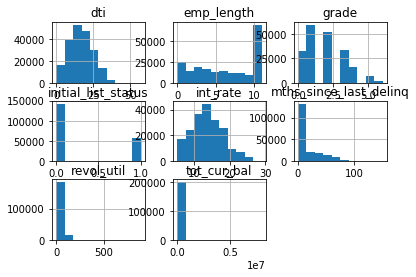

In [6]:
new_data.hist();

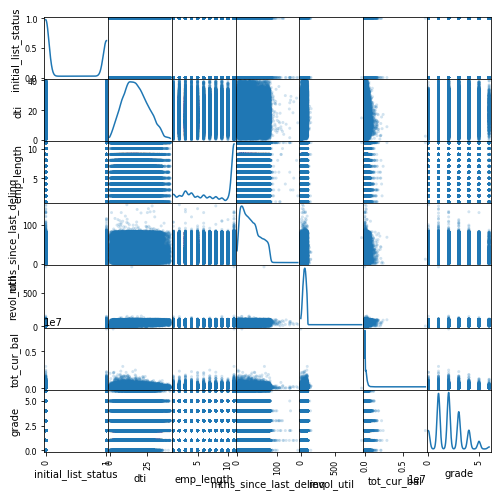

In [28]:
from pandas.plotting import scatter_matrix

colors = {0: 'red', 1: 'green'}

scatter_matrix(new_data,
              figsize=(8, 8),
              diagonal='kde',
              alpha=0.2);

Text(0, 0.5, 'grade')

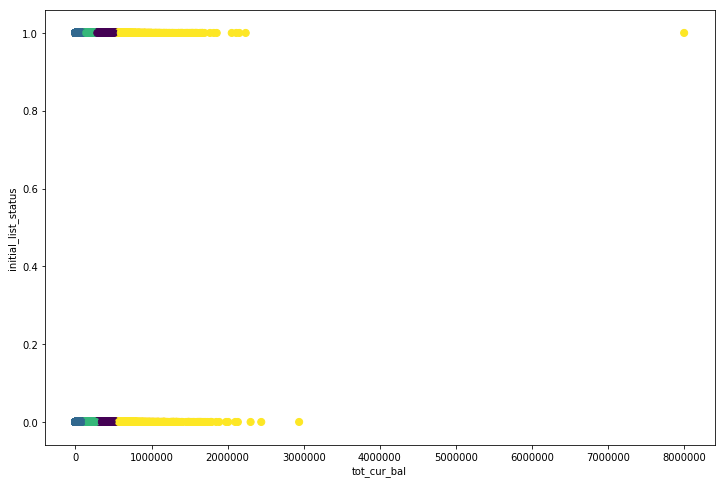

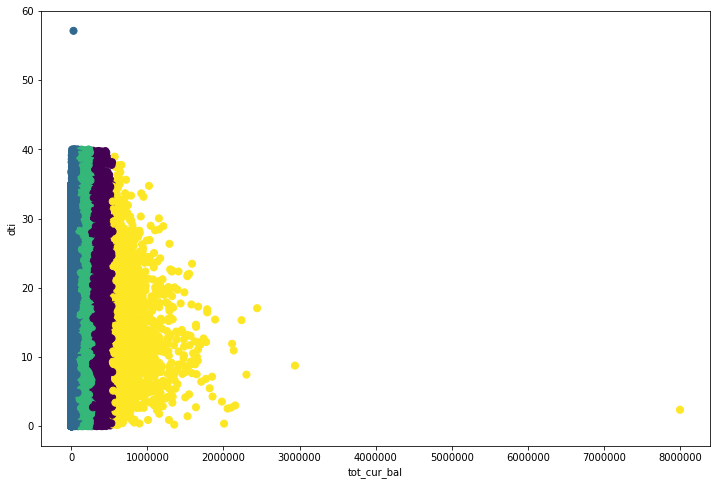

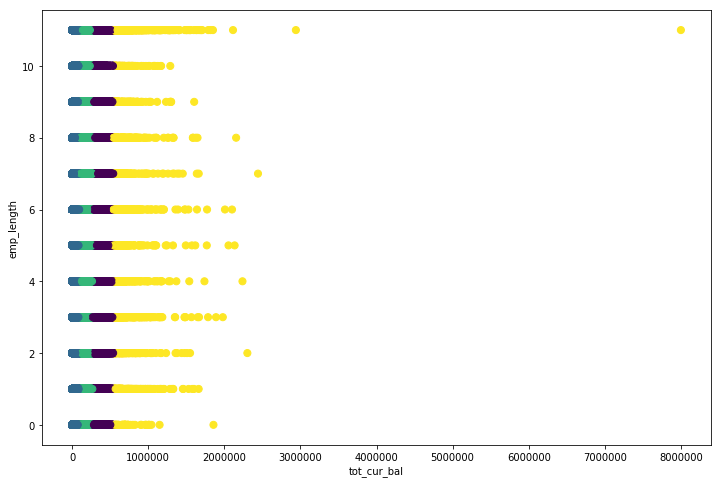

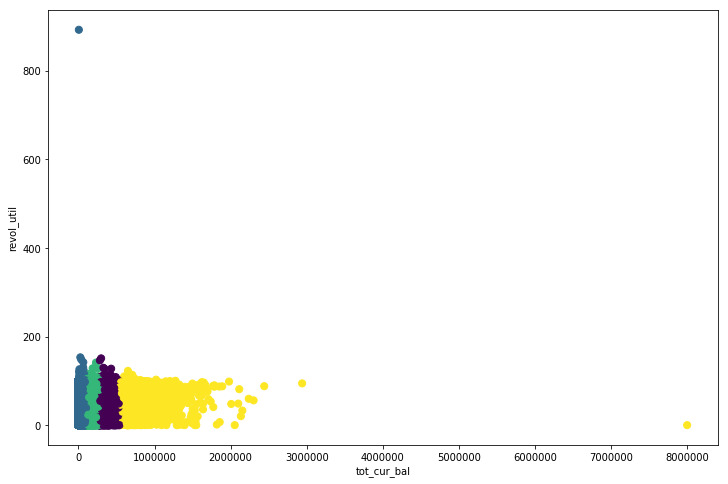

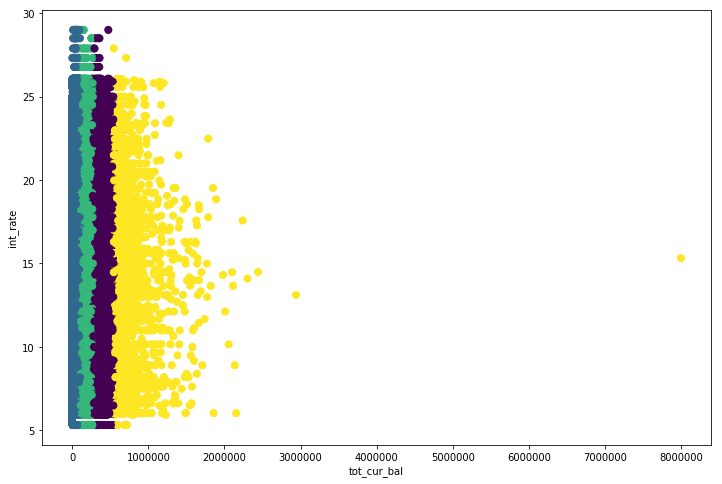

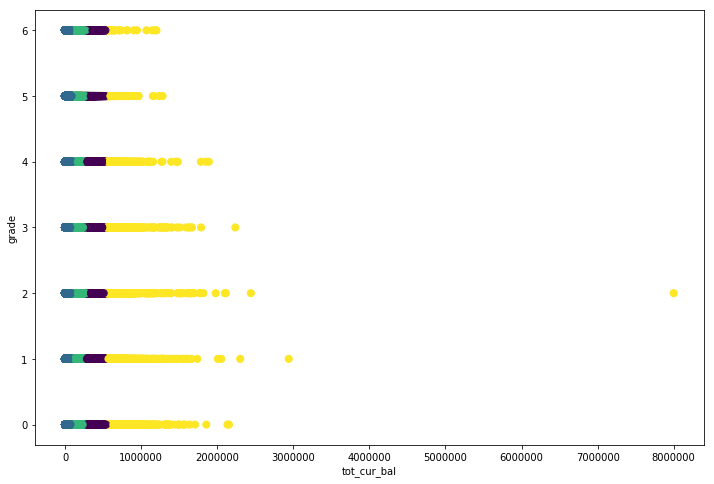

In [5]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4, random_state=32)
kmeans.fit(new_data)


# Visualizing using PCA
# pca = PCA(n_components=5)
# res = pca.fit_transform(new_data)
# plt.figure(figsize=(12,8))
# plt.scatter(res[:,0], res[:,3], c=kmeans.labels_, s=50, cmap='viridis')
# plt.title('PCA')

# print(kmeans.cluster_centers_)

# plt.figure(figsize=(12,8))
# plt.scatter(new_data['initial_list_status'], new_data['mths_since_last_delinq'], c=kmeans.labels_, s=50, cmap='viridis')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['initial_list_status'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('initial_list_status')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['dti'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('dti')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['emp_length'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('emp_length')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['revol_util'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('revol_util')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['int_rate'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('int_rate')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['grade'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('grade')



In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# # new_data = new_data.drop(['initial_list_status', 'revol_util'], axis=1)
# other_data = pd.DataFrame()
# other_data['dti'] = data['dti']
# link = linkage(other_data)

Text(0, 0.5, 'grade')

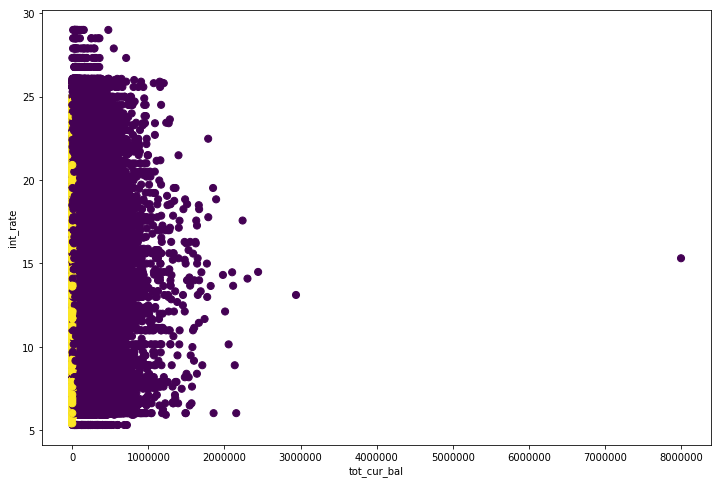

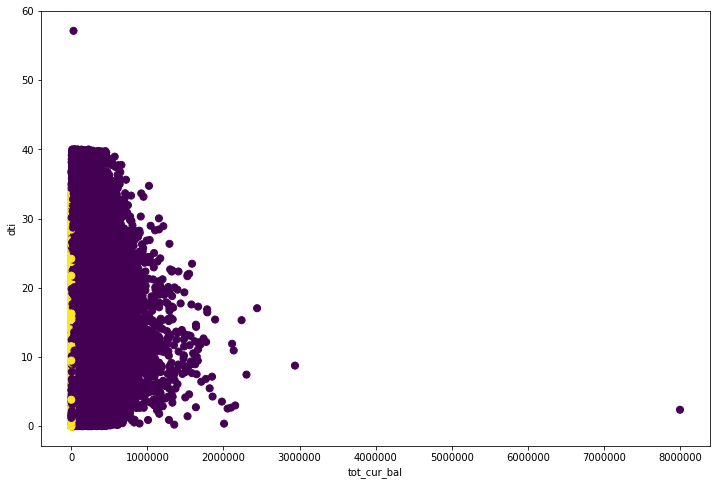

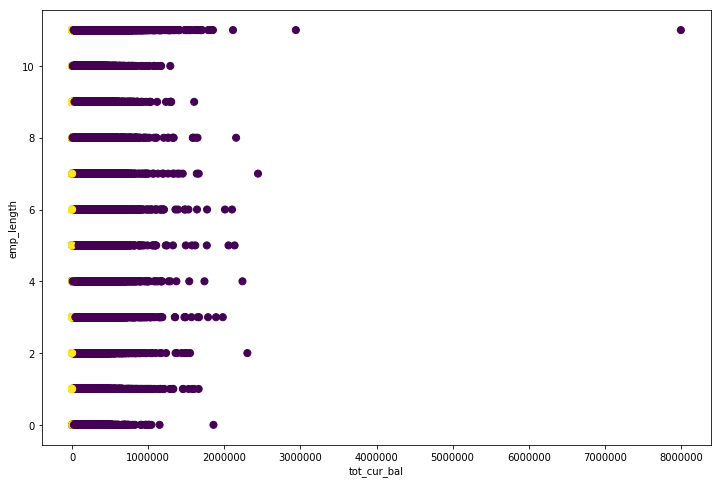

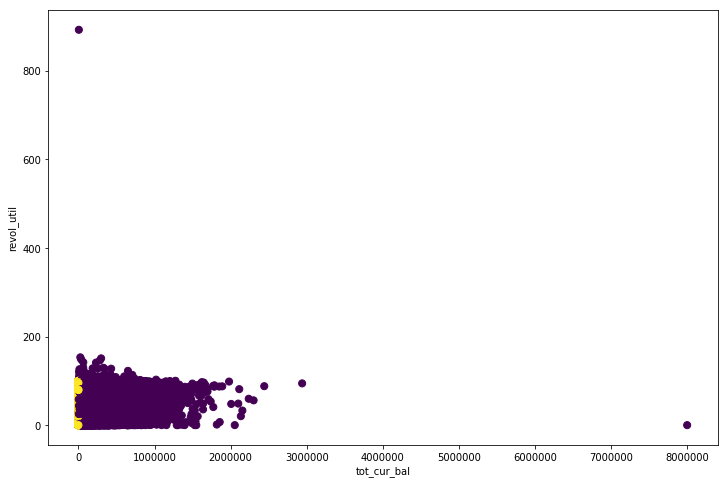

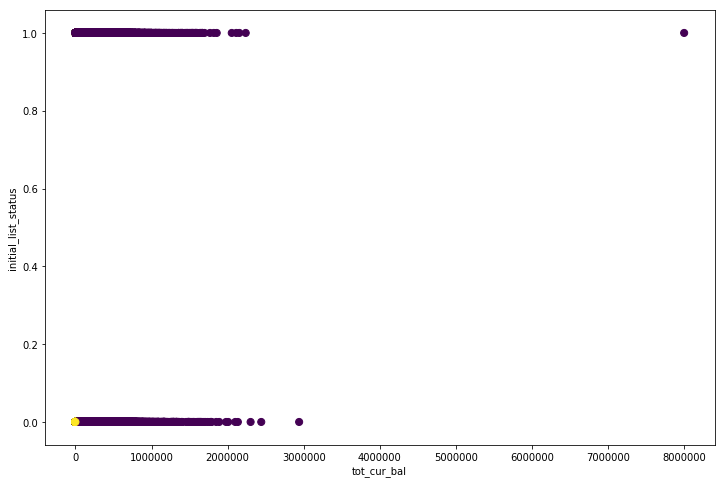

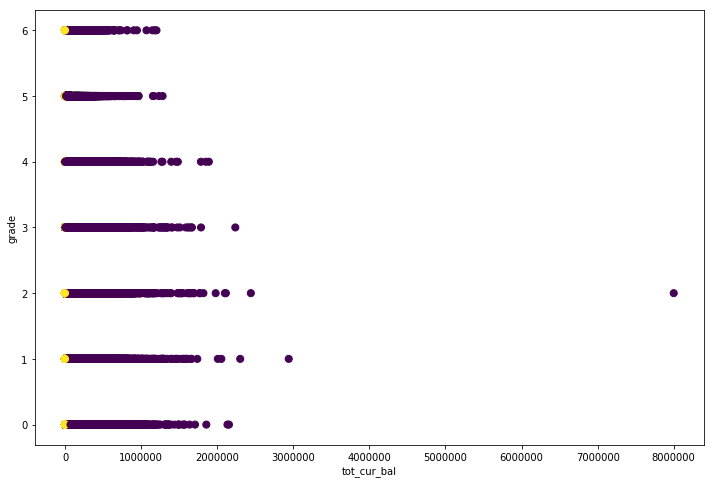

In [4]:
from sklearn.cluster import DBSCAN


dbs = DBSCAN(eps=10, min_samples=50)
dbs.fit(new_data)

# pca = PCA(n_components=5)
# res = pca.fit_transform(new_data)
# plt.figure(figsize=(12,8))
# plt.scatter(res[:,0], res[:,4], c=dbs.labels_, s=50, cmap='viridis')
# plt.title('PCA')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['int_rate'], c=dbs.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('int_rate')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['dti'], c=dbs.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('dti')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['emp_length'], c=dbs.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('emp_length')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['revol_util'], c=dbs.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('revol_util')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['initial_list_status'], c=dbs.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('initial_list_status')

plt.figure(figsize=(12,8))
plt.scatter(new_data['tot_cur_bal'], new_data['grade'], c=dbs.labels_, s=50, cmap='viridis')
plt.xlabel('tot_cur_bal')
plt.ylabel('grade')